 # Lending Club Case Study
 
    

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
loan_1 = pd.read_csv("/home/raji/Desktop/ml_andrewng/Datamining/IIIT_material/statistics/IIIT_assignment2/loan.csv",low_memory=False)

In [3]:
#Print out the number of missing values in each column in the given dataframe.


In [4]:
print(loan_1.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [5]:
#Find the percentage of missing values:

In [6]:
missing = round(100*(loan_1.isnull().sum()/len(loan_1.id)), 2)

In [7]:
missing

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [8]:
#Find the columns percentage of missing values above 90

In [9]:
columns_missingvalues = loan_1.columns[100*(loan_1.isnull().sum()/len(loan_1.index)) > 90]
columns_missingvalues

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [10]:
# Drop the columns with missing values above 90 percent

In [11]:
loan_1 = loan_1.drop(columns_missingvalues, axis=1)
print(loan_1.shape)

(39717, 55)


In [12]:
100*(loan_1.isnull().sum()/len(loan_1.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [13]:
#Fins columns with more than 50 percent missing values

In [14]:
len(loan_1[loan_1.isnull().sum(axis=1) > 5].index)

4

In [15]:
#Drop the columns with values missing above 50%

In [16]:
loan_1 = loan_1.drop(['desc', 'mths_since_last_delinq','chargeoff_within_12_mths','collections_12_mths_ex_med','tax_liens'], axis=1)

In [17]:
loan_1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,0.00,0.00,Jul-10,80.90,Jun-10,1,INDIVIDUAL,0,0,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,0.00,0.00,Jul-10,281.94,Jul-10,1,INDIVIDUAL,0,0,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,0.00,Apr-08,0.00,Jun-07,1,INDIVIDUAL,0,0,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,0.00,Jan-08,0.00,Jun-07,1,INDIVIDUAL,0,0,NaN


In [18]:
#For "policy_code","acc_now_delinq","initial_list_status", 'delinq_amnt',"pymnt_plan"" have only one value 0 , n, F so drop them
#and id and memeber id are unique value which can be dropped.
loan_1 = loan_1.drop(["policy_code","acc_now_delinq","delinq_amnt","initial_list_status","pymnt_plan","id","member_id"], axis=1)

In [19]:
#convert Cell int_rate to flot from type object

In [20]:
loan_1['int_rate'] = loan_1['int_rate'].str.rstrip('%').astype('float')

In [21]:
loan_1.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,...,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260
std,7456.670694,7187.238670,7128.450439,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,...,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,...,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,...,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,...,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,...,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [22]:
loan_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null float64
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_title                  37258 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
url                        39717 non-null object
purpose                    39717 non-null object
title                      39706 non-null object
zip_cod

In [23]:
loan_1['revol_util'] = loan_1['revol_util'].str.rstrip('%').astype('float')

In [24]:
loan_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null float64
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_title                  37258 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
url                        39717 non-null object
purpose                    39717 non-null object
title                      39706 non-null object
zip_cod

In [25]:
#categorical values

In [26]:
object_columns = loan_1.select_dtypes(include=['object'])

In [27]:
category_cols = ['term','grade','emp_length','home_ownership','verification_status','addr_state']
for name in category_cols:
    print(name,':')
    print(object_columns[name].value_counts(),'\n')

term :
 36 months    29096
 60 months    10621
Name: term, dtype: int64 

grade :
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64 

emp_length :
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64 

home_ownership :
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64 

verification_status :
Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64 

addr_state :
CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
OH    1223
MD    1049
AZ     879
WA     840
CO     792
NC     788
CT     751
MI     720
MO     686
MN     615
NV     497
SC     472
WI     460
AL     452
OR     45

In [28]:
#title and purpose are same, url address and zipcode is not needed drop them.

In [29]:
loan_1 = loan_1.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)


In [30]:
loan_1.to_csv(r'/home/raji/Desktop/ml_andrewng/Datamining/IIIT_material/statistics/IIIT_assignment2\cleaned2.csv')

In [31]:
EMP_length ={"emp_length": {
"10+ years": 10,
"9 years": 9,
"8 years": 8,
"7 years": 7,
"6 years": 6,
"5 years": 5,
"4 years": 4,
"3 years": 3,
"2 years": 2,
"1 year": 1,
"< 1 year": 0,
"n/a": 0}}

In [32]:
loan_1 =loan_1.replace(EMP_length)

# Data Analysis:

## Data Anlaysis is done on the following:

### 1)Applicant data: Demographic variables such as age, occupation, employment details etc.
### 2)Loan Characteristics: Amount of loan, interest rate, purpose of loan etc.
### 3)Customer behaviour variables :those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc

### We can remove the customer behaviour variables are not avaialbale at the time of loan approval


In [33]:
# Drop the customer behaviour variables

In [34]:
loan_1 = loan_1.drop(["delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  ], axis=1)

In [35]:
#Explore the target column:


In [36]:
loan_1["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [37]:
# We can remove Current as it is neither fully paid not defaulted, we are interested in Fully paid and Charged off.
# We will convert Fully paid to 1 and charged off to 0

In [38]:

loan_1 = loan_1[(loan_1["loan_status"] == "Fully Paid") |
(loan_1["loan_status"] == "Charged Off")]
binary_dict = {"loan_status":{ "Fully Paid": 0, "Charged Off": 1}}
loan_1 = loan_1.replace(binary_dict)

In [39]:
loan_1["loan_status"].value_counts()


0    32950
1     5627
Name: loan_status, dtype: int64

In [40]:
# distribution of loans across years



In [41]:
loan_1['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [42]:
# first get month and year using python datetime

In [43]:
from datetime import datetime
loan_1['issue_d'] = loan_1['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [44]:
loan_1['month'] = loan_1['issue_d'].apply(lambda x: x.month)
loan_1['year'] = loan_1['issue_d'].apply(lambda x: x.year)

## Univariate Analysis

In [45]:
#Lets start with target variable loan_status

In [46]:
round(np.mean(loan_1['loan_status']), 2)


0.15

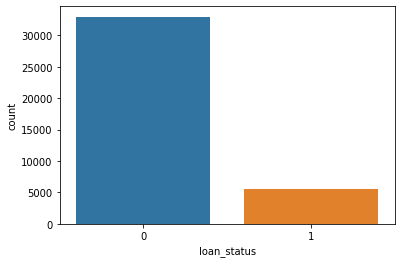

In [47]:
sns.countplot(x='loan_status',data=loan_1)
plt.show()

In [48]:
# Loan status for fully charged is high

In [49]:
# Lets plot loan across the grade

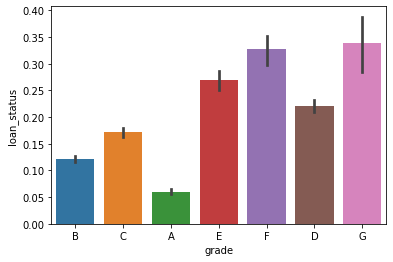

grade
G    0.337793
F    0.326844
E    0.268494
D    0.219862
C    0.171943
B    0.122056
A    0.059930
Name: loan_status, dtype: float64

In [50]:
sns.barplot(x='grade', y='loan_status', data=loan_1)
plt.show()
loan_1.groupby('grade').loan_status.mean().sort_values(ascending=False)

In [51]:
# Default rate is increasing from A to G

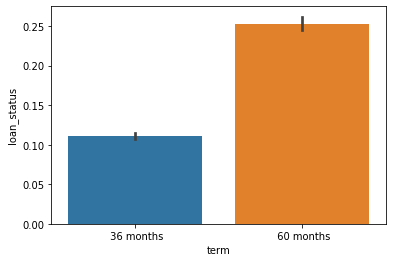

In [52]:

sns.barplot(x='term', y='loan_status', data=loan_1)
plt.show()

In [53]:
# 36 months loans default less than 60 months loans

## Nominal data analysis

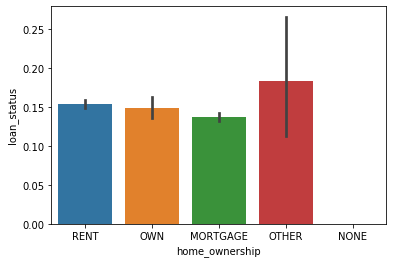

home_ownership
OTHER       0.183673
RENT        0.153626
OWN         0.148908
MORTGAGE    0.136713
NONE        0.000000
Name: loan_status, dtype: float64

In [54]:

sns.barplot(x='home_ownership', y='loan_status', data=loan_1)
plt.show()
loan_1.groupby('home_ownership').loan_status.mean().sort_values(ascending=False)

In [55]:
# Other loans default is high

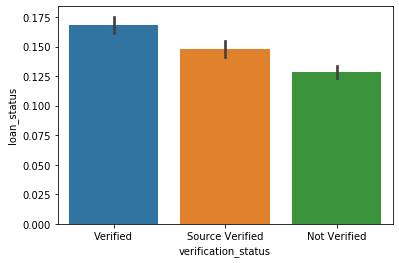

verification_status
Verified           0.168032
Source Verified    0.148186
Not Verified       0.128310
Name: loan_status, dtype: float64

In [56]:
sns.barplot(x='verification_status', y='loan_status', data=loan_1)
plt.show()
loan_1.groupby('verification_status').loan_status.mean().sort_values(ascending=False)

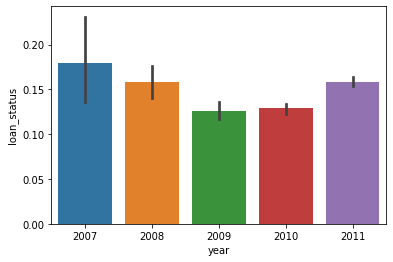

year
2007    0.179283
2011    0.158705
2008    0.158131
2010    0.128772
2009    0.125954
Name: loan_status, dtype: float64

In [57]:
sns.barplot(x='year', y='loan_status', data=loan_1)
plt.show()
loan_1.groupby('year').loan_status.mean().sort_values(ascending=False)

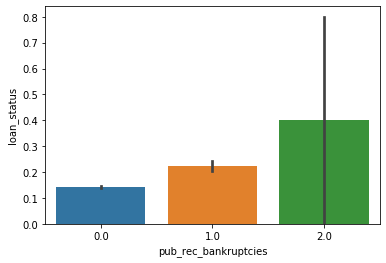

pub_rec_bankruptcies
2.0    0.400000
1.0    0.223580
0.0    0.141868
Name: loan_status, dtype: float64

In [58]:

sns.barplot(x='pub_rec_bankruptcies', y="loan_status", data=loan_1)
plt.show()
loan_1.groupby('pub_rec_bankruptcies').loan_status.mean().sort_values(ascending=False)

In [59]:
# From 2007 there is slight decrease in defaulting

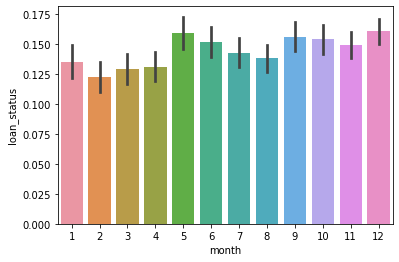

month
12    0.160854
5     0.159644
9     0.156375
10    0.154214
6     0.151887
11    0.149276
7     0.142942
8     0.138135
1     0.134931
4     0.130696
3     0.128948
2     0.122986
Name: loan_status, dtype: float64

In [60]:
sns.barplot(x='month', y='loan_status', data=loan_1)
plt.show()
loan_1.groupby('month').loan_status.mean().sort_values(ascending=False)

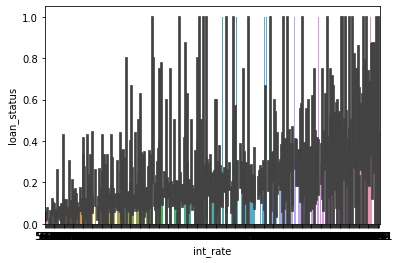

int_rate
24.40    1.0
22.64    1.0
17.46    1.0
14.62    1.0
16.15    1.0
        ... 
14.82    0.0
15.07    0.0
15.13    0.0
15.45    0.0
14.25    0.0
Name: loan_status, Length: 370, dtype: float64

In [61]:
sns.barplot(x='int_rate', y='loan_status', data=loan_1)
plt.show()
loan_1.groupby('int_rate').loan_status.mean().sort_values(ascending=False)

## Continous variable

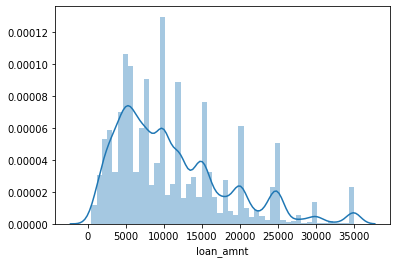

In [62]:
sns.distplot(loan_1['loan_amnt'])
plt.show()

## corelation 

In [63]:
loan_amount = loan_1['loan_amnt'].astype('float')

loan_amount.corr(loan_1['int_rate'])

0.3012652363773923

In [64]:
loan_amount.corr(loan_1['funded_amnt_inv'])

0.9379219971403718

In [65]:
installment = loan_1['installment'].astype('float')
installment.corr(loan_1['int_rate'])


0.2772034121541834

In [66]:
installment = loan_1['installment'].astype('float')
annual_income= loan_1['annual_inc'].astype('float')
installment.corr(annual_income)

0.26784185177417813

In [67]:
annual_income= loan_1['annual_inc'].astype('float')

annual_income.corr(loan_1['int_rate'])



0.048899125120824886

In [68]:
corr=loan_1.corr()
corr['loan_amnt']

loan_amnt               1.000000
funded_amnt             0.981790
funded_amnt_inv         0.937922
int_rate                0.301265
installment             0.932260
annual_inc              0.268999
loan_status             0.059463
dti                     0.062436
pub_rec_bankruptcies   -0.035981
month                   0.051902
year                    0.109814
Name: loan_amnt, dtype: float64

In [69]:
corr=loan_1.corr()
corr['loan_status']

loan_amnt               0.059463
funded_amnt             0.056497
funded_amnt_inv         0.037781
int_rate                0.211390
installment             0.027153
annual_inc             -0.040867
loan_status             1.000000
dti                     0.045078
pub_rec_bankruptcies    0.047757
month                   0.024762
year                    0.024451
Name: loan_status, dtype: float64

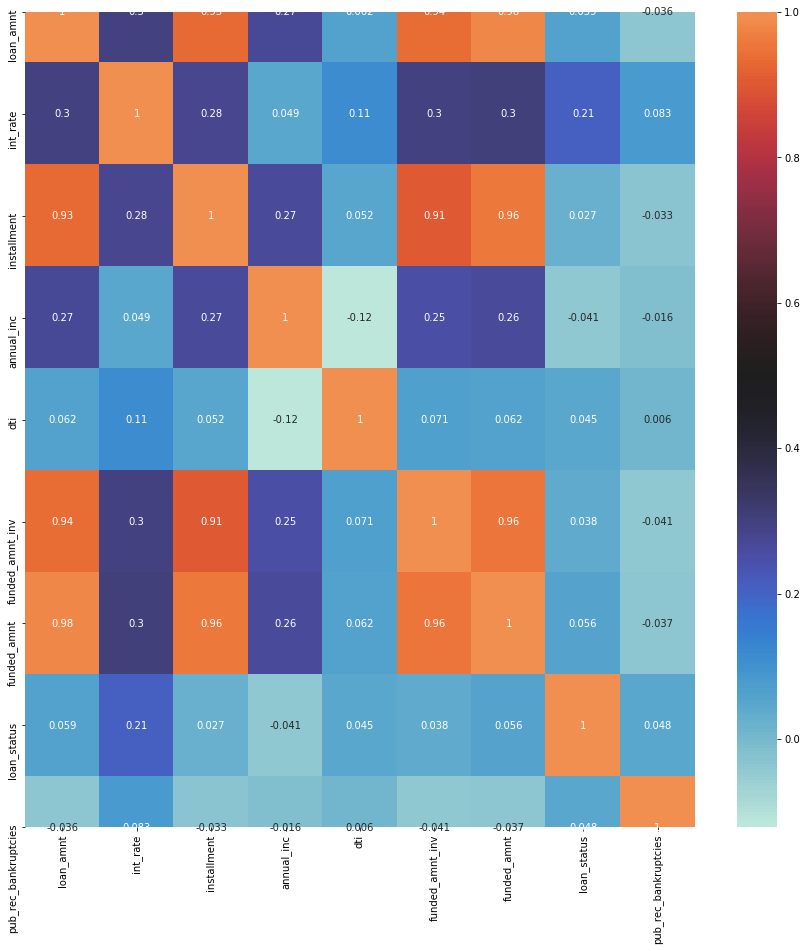

In [70]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'funded_amnt_inv', 'funded_amnt',
        'loan_status', 'pub_rec_bankruptcies',
      ]
corr = loan_1[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

## Binning/bucketing 

In [71]:
#binning
def int_rate(n):
    if n <= 10:
        return 'low_int'
    elif n > 10 and n <=15:
        return 'Mid_int'
    elif n > 15 and n <=20:
        return 'High_int'
    else:
        return 'Very_high_int'

loan_1['int_rate'] = loan_1['int_rate'].apply(lambda x: int_rate(x))

In [72]:
#Employee Length
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'Middle_level'
    else:
        return 'Senior'

loan_1['emp_length'] = loan_1['emp_length'].apply(lambda x: emp_length(x))

In [73]:
# Annual Income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'
loan_1['annual_inc'] = loan_1['annual_inc'].apply(lambda x: annual_income(x))

In [74]:
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
loan_1['loan_amnt'] = loan_1['loan_amnt'].apply(lambda x: loan_amount(x))

In [75]:
loan_1['funded_amnt_inv'] = loan_1['funded_amnt_inv'].apply(lambda x: loan_amount(x))

In [76]:
# loan amount to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

loan_1['dti'] = loan_1['dti'].apply(lambda x: dti(x))

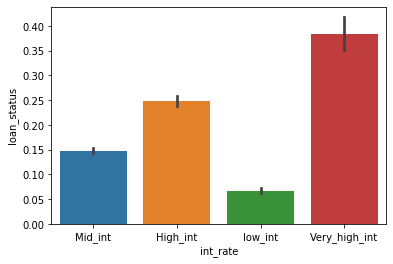

int_rate
Very_high_int    0.384416
High_int         0.248270
Mid_int          0.148207
low_int          0.067392
Name: loan_status, dtype: float64

In [77]:
sns.barplot(x='int_rate', y='loan_status', data=loan_1)
plt.show()
loan_1.groupby('int_rate').loan_status.mean().sort_values(ascending=False)

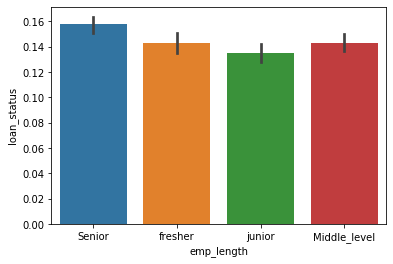

emp_length
Senior          0.157610
Middle_level    0.143063
fresher         0.142634
junior          0.135132
Name: loan_status, dtype: float64

In [78]:
sns.barplot(x='emp_length', y='loan_status', data=loan_1)
plt.show()
loan_1.groupby('emp_length').loan_status.mean().sort_values(ascending=False)

Senior level high default

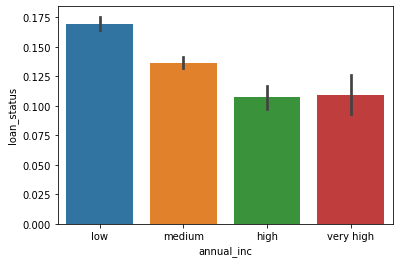

annual_inc
low          0.169797
medium       0.136782
very high    0.109690
high         0.107384
Name: loan_status, dtype: float64

In [79]:
sns.barplot(x='annual_inc', y='loan_status', data=loan_1)
plt.show()
loan_1.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)

Higher the income high default

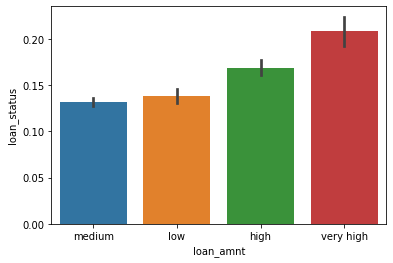

loan_amnt
very high    0.208182
high         0.168919
low          0.137963
medium       0.131802
Name: loan_status, dtype: float64

In [80]:
sns.barplot(x='loan_amnt', y='loan_status', data=loan_1)
plt.show()
loan_1.groupby('loan_amnt').loan_status.mean().sort_values(ascending=False)

Peopel with medium and  low high default rate

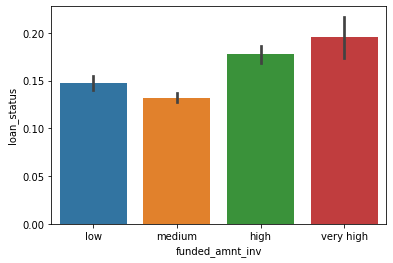

funded_amnt_inv
very high    0.195445
high         0.177817
low          0.147018
medium       0.131857
Name: loan_status, dtype: float64

In [81]:
sns.barplot(x='funded_amnt_inv', y='loan_status', data=loan_1)
plt.show()
loan_1.groupby('funded_amnt_inv').loan_status.mean().sort_values(ascending=False)

Funnded amount  with low and medium high default rate

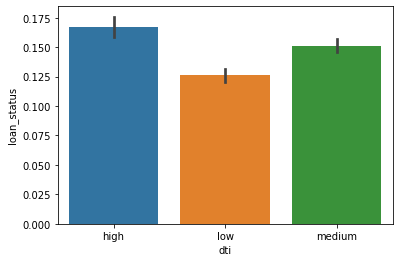

dti
high      0.167338
medium    0.151348
low       0.126092
Name: loan_status, dtype: float64

In [82]:
sns.barplot(x='dti', y='loan_status', data=loan_1)
plt.show()
loan_1.groupby('dti').loan_status.mean().sort_values(ascending=False)

dti amount  with high high default rate

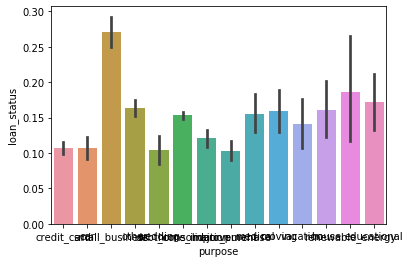

purpose
small_business        0.270810
renewable_energy      0.186275
educational           0.172308
other                 0.163777
house                 0.160763
moving                0.159722
medical               0.155653
debt_consolidation    0.153254
vacation              0.141333
home_improvement      0.120696
credit_card           0.107818
car                   0.106738
wedding               0.103672
major_purchase        0.103256
Name: loan_status, dtype: float64

In [83]:
sns.barplot(x='purpose', y='loan_status', data=loan_1)
plt.show()
loan_1.groupby('purpose').loan_status.mean().sort_values(ascending=False)

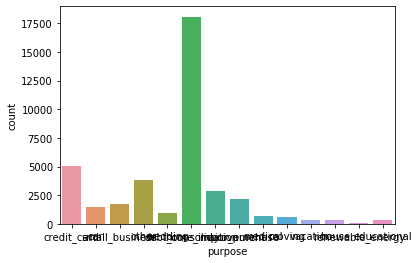

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [84]:
sns.countplot(x='purpose', data=loan_1)
plt.show()

loan_1["purpose"].value_counts()

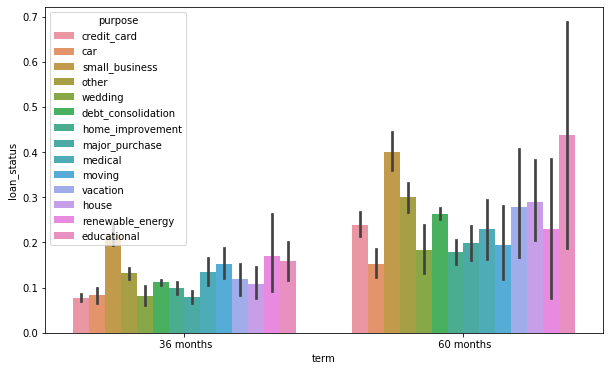

In [85]:
#Segment by term for porpose
plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=loan_1)
plt.show()

In [86]:
# Take top 5 loan purpose
top_5 = ['debt_consolidation','credit_card','other','home_improvement','major_purchase','small_business']
loan_1 = loan_1[loan_1['purpose'].isin(top_5)]

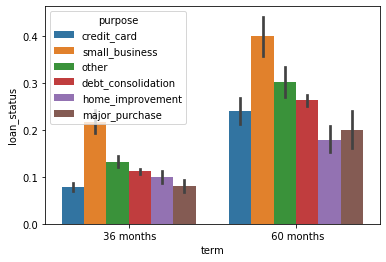

In [87]:
# segment terms with purpose
sns.barplot(x='term', y="loan_status", hue='purpose', data=loan_1)
plt.show()

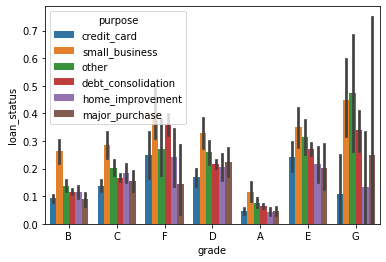

In [88]:
# segment terms with grade
sns.barplot(x='grade', y="loan_status", hue='purpose', data=loan_1)
plt.show()

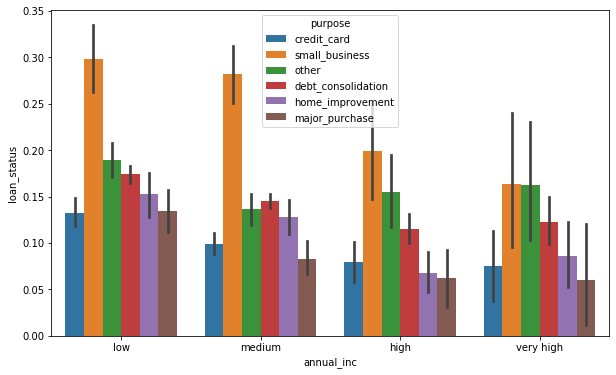

In [89]:
#Segment by annual income for porpose
plt.figure(figsize=[10, 6])
sns.barplot(x='annual_inc', y="loan_status", hue='purpose', data=loan_1)
plt.show()


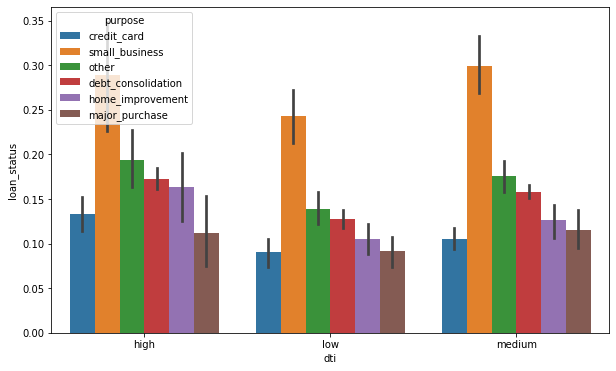

In [90]:
#Segment by dti for porpose
plt.figure(figsize=[10, 6])
sns.barplot(x='dti', y="loan_status", hue='purpose', data=loan_1)
plt.show()

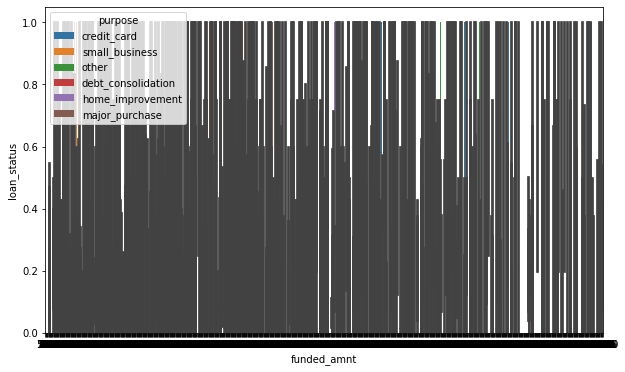

In [91]:
#Segment by funded_amnt for porpose
plt.figure(figsize=[10, 6])
sns.barplot(x='funded_amnt', y="loan_status", hue='purpose', data=loan_1)
plt.show()